In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import geopandas as gpd
from descartes import PolygonPatch
import glob
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [ ]:
dt = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
dt_nq = dt.iloc[1:]

dt_nq.Q3 = dt_nq.Q3.replace('Iran, Islamic Republic of...', 'Iran')
dt_nq.Q3 = dt_nq.Q3.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
dt_nq.Q3 = dt_nq.Q3.replace('United Arab Emirates', 'UAE')
dt_nq.Q3 = dt_nq.Q3.replace('United States of America', 'USA')
dt_nq.Q3 = dt_nq.Q3.replace('Republic of Korea', 'South Korea')

In [ ]:
conts = { 'Asia & Australia' : ['Japan','India','China','Indonesia','Singapore','Pakistan', 'Nepal', 'South Korea', 
                    'Saudi Arabia', 'Taiwan', 'UAE','Viet Nam', 'Thailand',
                    'Philippines','Turkey','Iran','Republic of Korea', 
                    'Bangladesh','Malaysia','Israel','Sri Lanka', 'Australia'
                   ],
         'Europe' : [ 'Germany','Switzerland','Russia','Netherlands','Poland', 'Belarus','Portugal',
                     'Ukraine', 'Belgium','Italy', 'Spain', 'Ireland', 'Romania','Sweden',
                     'United Kingdom', 'France', 'Greece',
                    ],
         'America' : ['Colombia', 'United States of America', 'Argentina','Brazil', 
                     'Canada','Mexico','Peru','Chile',
                     ],
         'Africa' :['South Africa','Egypt','Tunisia','Nigeria','Morocco','Ghana','Kenya', 'Algeria'],
         
}

def getCont(ctr):
    if ctr in conts['Asia & Australia']:
        return 'Asia & Australia'
    elif ctr in conts['Europe']:
        return 'Europe'
    elif ctr in conts['America']:
        return 'America'
    elif ctr in conts['Africa']:
        return 'Africa'
    else:
        return 'UND'
    
dt_nq['Continent'] = dt_nq['Q3'].apply(lambda x: getCont(x))

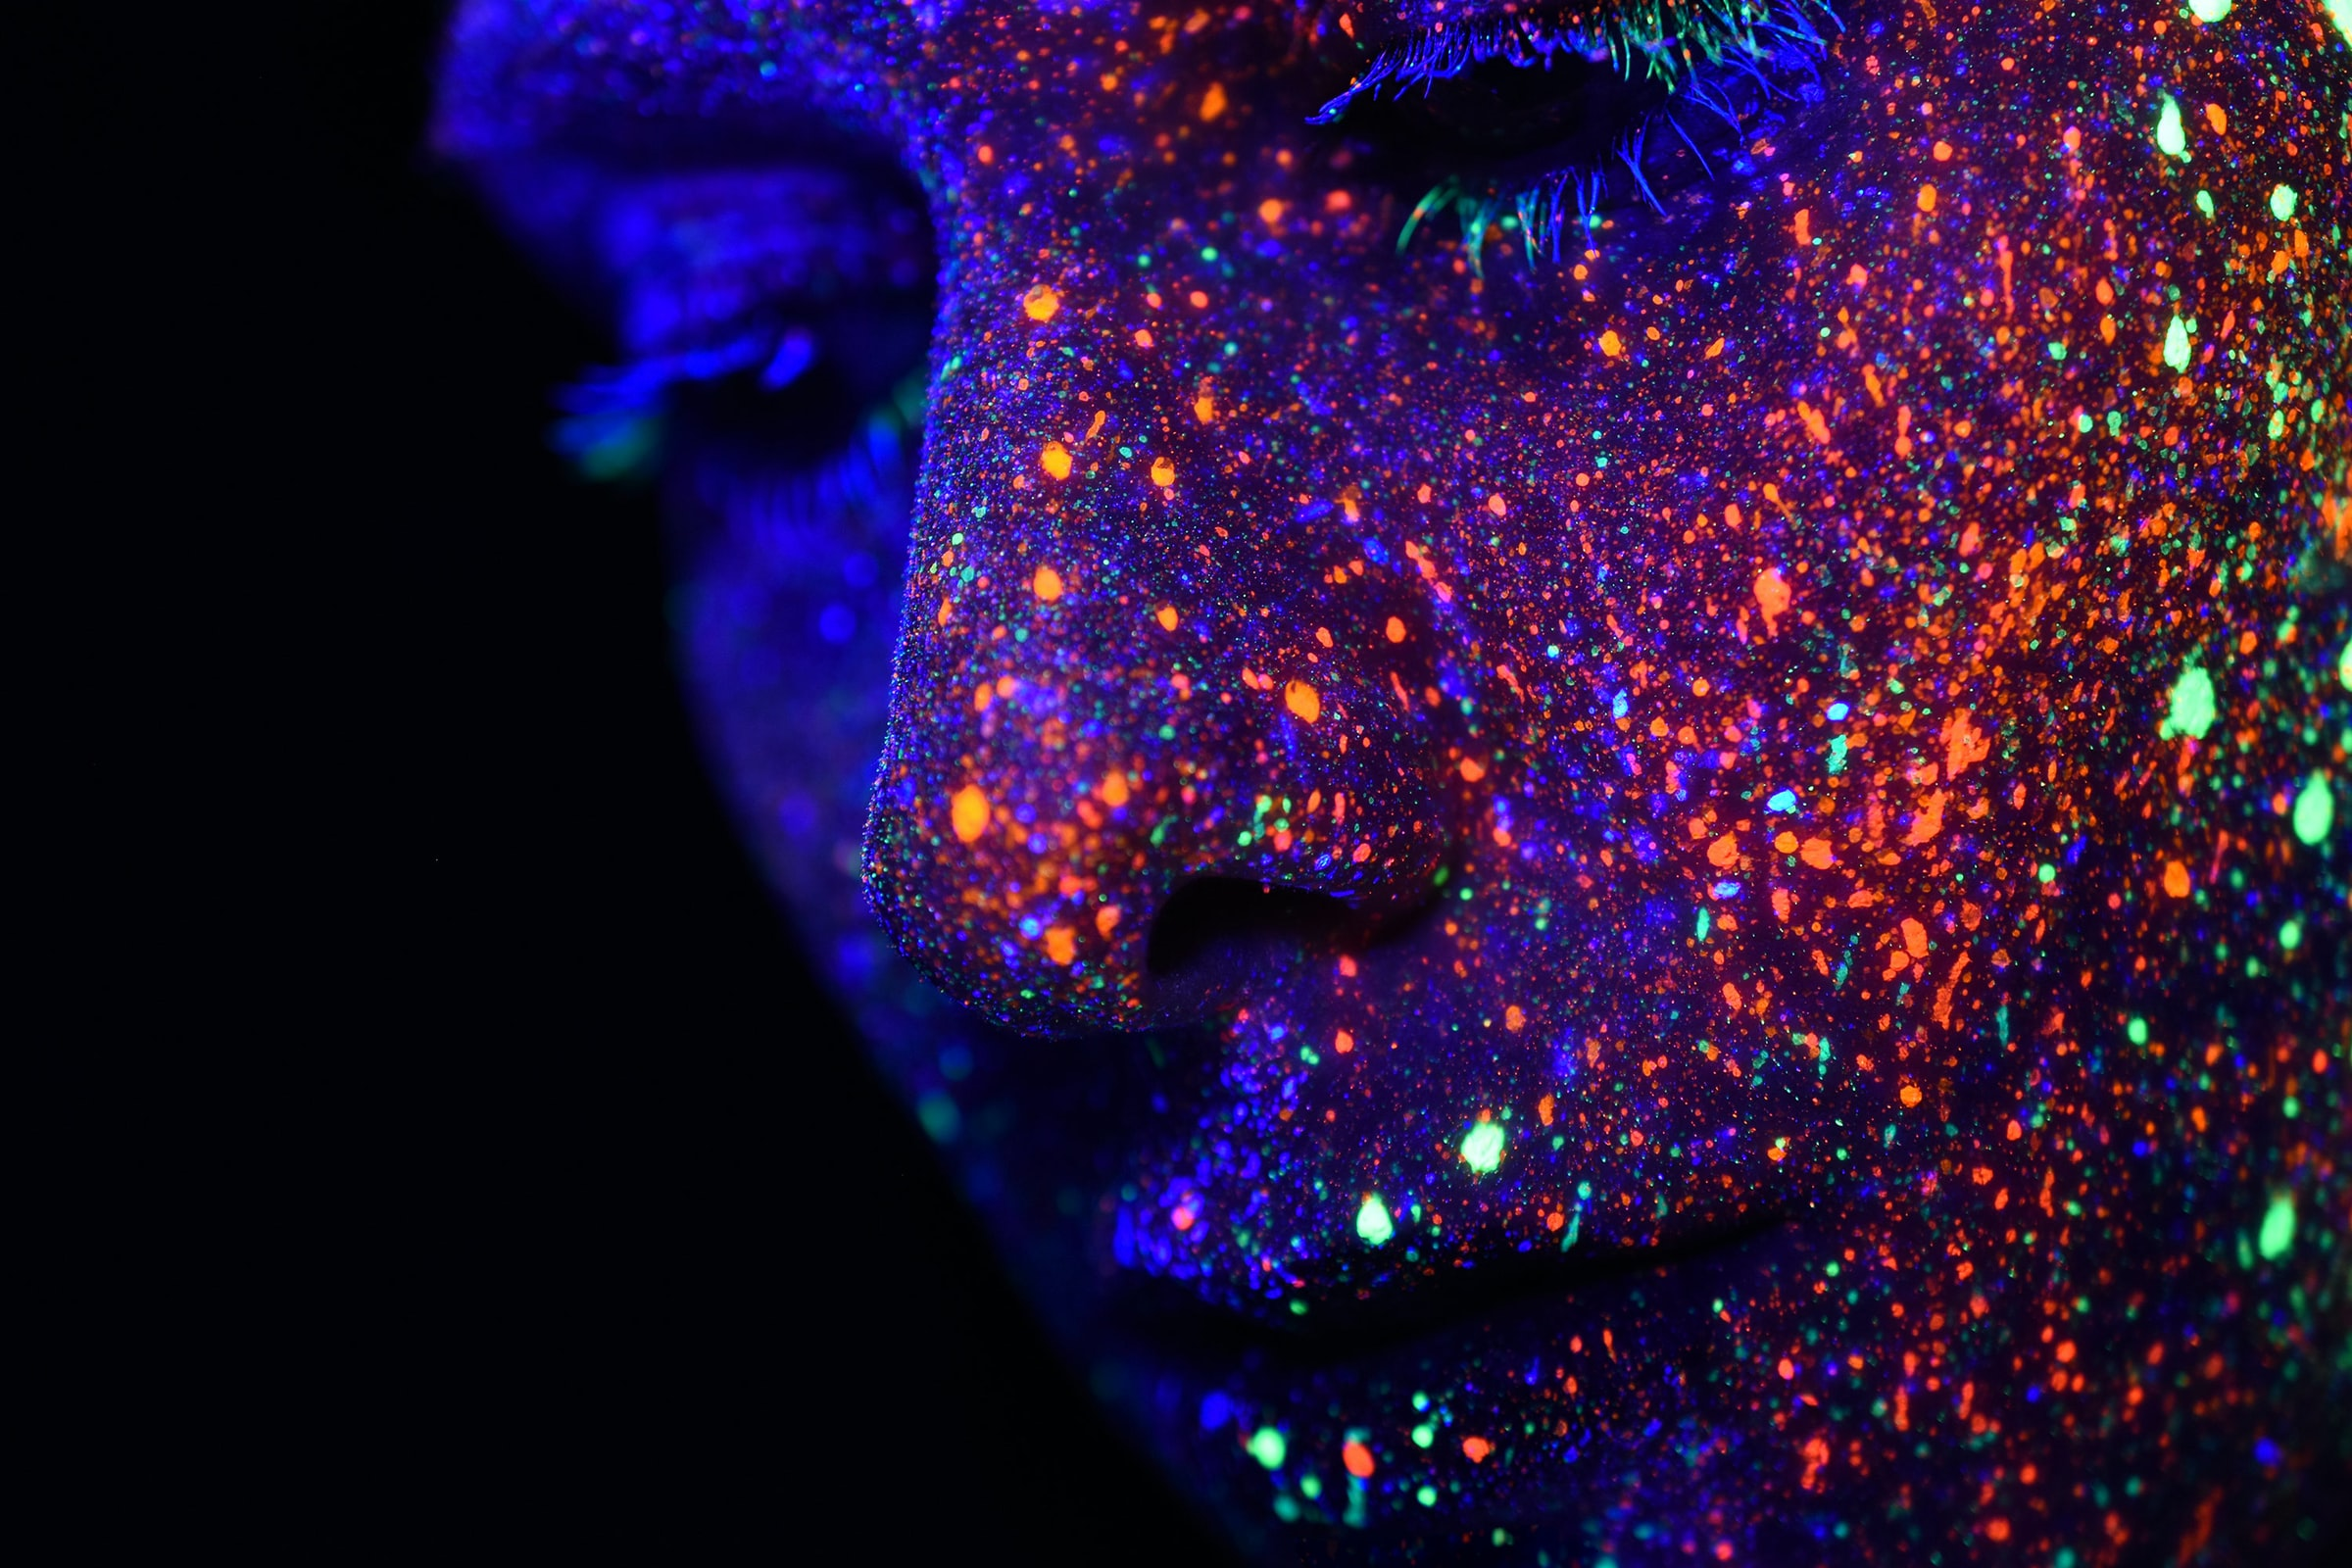
<span>Photo by <a href="https://unsplash.com/@heyerlein?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">h heyerlein</a> on <a href="https://unsplash.com/s/photos/machine-learning?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

In the last decade, the popularity of machine learning has growth rapidly. With abundance of data and supportive infrastucture, now we can retrieve relevant information and for some cases, by using machine learning, this process/information can influence the decision making. In addition, it is not uncommon for us to find many companies offering machine learning / data-based solutions or services, or applying them inside the companies so that operations are more efficient. Currently, professions related to data, including machine skills are one of the most sought-after jobs or skills.

This notebook contains some analysis about 2020 Kaggle Machine Learning & Data Science Survey. The dataset contains survey results from worldwide participants answering things related about their background and machine learning/data science application at work. The scope of this analysis is an attempt uncover some insights related to current state of machine learning/data practitioners in many countries.

# A Glimpse at Women 👩 as Data Practitioners

According to the studies done by [McKinsey](https://www.mckinsey.com/~/media/mckinsey/industries/public%20and%20social%20sector/our%20insights/future%20of%20organizations/the%20future%20of%20work%20in%20america%20people%20and%20places%20today%20and%20tomorrow/the-future-of-work-in-america-full-report.pdf), STEM-related occupations are expected to grow rapidly in the upcoming decade, with expected growth of 37%. As a part of the STEM field, Data Science is also predicted to follow the same pattern. Meanwhile, the portion of women working in STEM-related occupations is yet to be [increased](https://www.aauw.org/resources/research/the-stem-gap/). In this section, we are going to explore women participants as data professionals in this survey and their backgrounds.

## Distribution of Women Participants

In [ ]:
m = {'Prefer not to say':'Other', 'Prefer to self-describe':'Other', 'Nonbinary':'Other',
    'Man': 'Man', 'Woman':'Woman'}
dt_nq['Q2'] = dt_nq['Q2'].apply(lambda x : m[x])

VC = pd.DataFrame(dt_nq['Q2'].value_counts())

px.pie(VC, values = 'Q2', names = VC.index,  labels={'Q2':'% Participants', 'index': 'Gender Type'},
       title='Distribution of Gender for Kaggle Survey 2020 Participants',
      width=600, height=400)

In this survey, 79% are men and women a share of 19% of the total participants. To see deeper, we are going to see the distribution of women participants per country. Below is a chart showing the percentage of women participants joining this survey for each country, sorted descendingly.

In [ ]:
dt_gd_ctry = dt_nq.groupby(['Q3','Q2']).size().unstack(level=1, fill_value=0)

for c in dt_gd_ctry.index:
    dt_gd_ctry.loc[c] = (dt_gd_ctry.loc[c]/sum(dt_gd_ctry.loc[c])*100).astype(int)

dt_gd_ctry['Continent'] = list(map(lambda x: getCont(x), list(dt_gd_ctry.index)))

for i in dt_gd_ctry.index:
    dt_gd_ctry.loc[i, 'WomanPct'] = dt_gd_ctry.loc[i, 'Woman'] / sum(dt_gd_ctry.loc[i, ['Man', 'Woman', 'Other']])

In [ ]:
dt_gd_ctry['Country'] = dt_gd_ctry.index
top15_female = dt_gd_ctry.sort_values('WomanPct', ascending = False).head(15)
top15_female['WomanPct'] = top15_female['WomanPct'].apply(lambda x: round(x*100,1))

# Set position of bar on X axis

barWidth = 0
range_top15 = np.arange(len(top15_female))
masks = []

top15_female_countries = top15_female.index
for t in conts.keys():
    masks.append(top15_female.index.isin(conts[t]))


fig = px.bar(top15_female, x='Country', y='WomanPct',
             hover_data=['WomanPct'], color='Continent',
             labels={'WomanPct':'% Women Participants'}, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'}, 
                  title={'y':1,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'text' :"Which Countries Have The Highest Percentange of Women Participants?",
                        })
fig.show()

According to the chart above, in this year's survey, Malaysia has the highest percentage of women participants, followed by Tunisia in the second place. Of the top 15 countries, most of them are from Asia (9 of 15). Ireland and Canada are the countries with the highest percentage of women participants in Europe and America, respectively.

## Education Level 🎓 vs Yearly Compensation 💰

Being claimed as the sexiest job in the 21st century, Data Scientist is now in high demand both for the enterprises to improve the performance of the companies and the job seekers/employees. According to [Glassdoor](https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm), Data Scientist is the third most wanted job in USA (2020), with median base salary of $107,801. 

How about women who are involved in data? We are going to explore the educational background and yearly compensation for women in each country. Firstly, what is the median value of education level in this survey? This will be referred later as the benchmark.

In [ ]:
edu_map = {'I prefer not to answer': 0 ,'No formal education past high school' : 1,
         'Some college/university study without earning a bachelor’s degree' : 2,
         'Professional degree' : 3,"Bachelor’s degree": 3, "Master’s degree" : 4,
         'Doctoral degree':5}

edu = dt_nq.loc[dt_nq.Q4.notnull()]
edu['edu_cat'] = edu.Q4.map(lambda x: edu_map[x])

print("Median global education level:", list(edu_map.keys())[list(edu_map.values()).index(int(edu['edu_cat'].median()))])

The median value of educational level in this survey is Master's degree. According to the plot below,  most of the participants of this survey hold (or currently pursue) Master's Degree, while Bachelor's Degree are the second most educational level. This pattern also follows for the women participants.

In [ ]:
edu1 = edu.loc[edu.Q2.notnull(), ['Q2', 'Q4']]
edu1 = edu1.groupby(['Q2', 'Q4'])['Q4'].agg('count').unstack()

fig = go.Figure(data=[
    go.Bar(name='Man', x=edu1.columns, y=edu1.loc['Man'].values),
    go.Bar(name='Woman', x=edu1.columns, y=edu1.loc['Woman'].values),
    go.Bar(name='Other', x=edu1.columns, y=edu1.loc['Other'].values),
])
# Change the bar mode
fig.update_layout(barmode='stack',
                 title={'y':1, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top',
                        'text' :"Distribution of Formal Education Level",
                        })

fig.show()

Now, let's explore the countries' distribution in terms of women's education level and yearly compensation. As a reference, we are going to calculate the percentage of women for each country that hold at least Master's Degree title. This distribution will be plotted against the percentage of women with yearly compensation at least the median value of the country's yearly compensation. The size of each bubble depends on the number of women participants from each country.

In [ ]:
def getPctgEdu(c, g, dt):
    x = (dt.loc[(dt.Q2 == g) & (dt.Q3 == c)])
    ng = len(x)
    ne = len(x.loc[x.Q4.isin(["Master’s degree", 'Doctoral degree'])])
    return round(ne/ng*100,1)

df_edu_pct = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_edu_pct['Woman'] = df_edu_pct.Country.apply(lambda x: getPctgEdu(x, 'Woman', dt_nq))

map_value = { '$0-999' : 0, '1,000-1,999' : 1 ,'2,000-2,999' : 2,'3,000-3,999' : 3, 
              '4,000-4,999' : 4,'5,000-7,499' : 5, '7,500-9,999' : 6, '10,000-14,999' : 7,
              '15,000-19,999' : 8 ,'20,000-24,999': 9,'25,000-29,999' : 10,'30,000-39,999' : 11,
              '40,000-49,999' : 12,'50,000-59,999': 13,'60,000-69,999' : 14,'70,000-79,999' : 15,
              '80,000-89,999' :16,'90,000-99,999' : 17,'100,000-124,999' :18, '125,000-149,999': 19,
              '150,000-199,999' :20, '200,000-249,999' : 21,'250,000-299,999' : 22,'300,000-500,000' : 23,
              '> $500,000' : 25
}

# alls = dt_nq.loc[dt_nq.Q24.notnull()]
# alls['wg_cat'] = alls.Q24.apply(lambda x : map_value[x])

In [ ]:
def getPctgWage(c, g, isPct, dt):
    
    x = (dt.loc[(dt.Q3 == c) & (dt.Q24.notnull())])
    x['wg_cat'] = x.Q24.apply(lambda y : map_value[y])  
    med_inc = x['wg_cat'].median()
    
    d = (dt.loc[(dt.Q2 == g) & (dt.Q3 == c)])
    ng = len(d)
    
    nw = len(x.loc[(x.Q2 == g) & (x['wg_cat'] >= med_inc)])
    
    if isPct:
        return round(nw/ng*100,1)
    else:
        return ng
 
# Persentase wanita di negara tersebut yang yearly compensationnya >= median YC di negara tsb

df_wg_pct = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_wg_pct['Woman'] = df_wg_pct.Country.apply(lambda x: getPctgWage(x, 'Woman', True, dt_nq))
df_wg_pct['TotalAllWomen'] = df_wg_pct.Country.apply(lambda x: getPctgWage(x, 'Woman', False, dt_nq))

mrg_wg_edu = pd.merge(df_wg_pct, df_edu_pct, on='Country', how='outer', suffixes = ("_wg", '_ed'))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def getCC (c):
    if c in world.name.unique():
        return world.loc[world.name == c,'iso_a3'].values[0]
    else:
        return np.nan
    
mrg_wg_edu['CtryCd'] = mrg_wg_edu.Country.apply(lambda x: getCC(x))
mrg_wg_edu.loc[mrg_wg_edu.Country == 'Singapore','CtryCd'] = 'SGP'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'USA','CtryCd'] = 'USA'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'UAE','CtryCd'] = 'UAE'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'Viet Nam','CtryCd'] = 'VNM'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'UK','CtryCd'] = 'GBR'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'France','CtryCd'] = 'FRA'
mrg_wg_edu.loc[mrg_wg_edu.Country == 'Other','CtryCd'] = 'Other'

fig = px.scatter(mrg_wg_edu, x='Woman_wg', y='Woman_ed', size = 'TotalAllWomen',
                 hover_data=['Country'], text = 'CtryCd',
                 labels={'Woman_wg':"% Women with Yearly Compensation >= Country's Median Value",
                         'Woman_ed': '% Women with Education Level >= Master Degree',
                         'TotalAllWomen': 'Total Women Participants',
                         'CtryCd': 'Country Code',
                        }
                )

fig.update_traces(textfont_size=8, textposition='bottom right', marker=dict(color='#854144'))
fig.update_layout(
    font=dict(size=10),
    title={
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'text' :"Women Participants' Education Level vs Yearly Compensation",
    },
    xaxis = {
        'title' :"% Women with Yearly Compensation >= Country's Median Value",
    },
    yaxis = {
        'title' :"% Women with Education Level >= Master Degree",
    }    
)

fig.show()

According to the plot above, Portugal, Switzerland and the Netherlands are having better/higher percentages of women with yearly compensation and education level above the benchmarks. All of Belgian women participants hold at least Master's Degree title.
In terms of, yearly compensation, more than half of Tunisian women participants have higher yearly compensation than the median value of the Tunisians' yearly compensation. 

Looking at the same plot, the lower left quadrant of the plot is crowded with the countries. It can be inferred that majority of those countries still have less than 70% of women with at least a Master's Degree title working in data job. Those countries also have the women participants mostly paid lower than the country's median value of each country's yearly compensation.

# Exploration in Data Practitioners' Tech Experiences

Working as data professionals nowadays, we would not be far with using technologies to support the work or to enhance the quality of data analysis. Thus, programming and familiarity with machine learning methods (or the experience of applying them) are some common traits we will find among the data professionals. Now, let's see the distribution of all participants' experiences in programming and machine learning for each country. 

First, we retrieve the median value of programming experience for all participants as the benchmark.

### Programming Experiences 👨🏽‍💻

In [ ]:
prog_map = {'I have never written code' : 0,
            '< 1 years' : 1,
            '1-2 years' : 2,
            '3-5 years' : 3,
            '5-10 years' : 4, 
            '10-20 years' : 5,   
            '20+ years' : 6,  
           }

prog = dt_nq.loc[dt_nq.Q6.notnull()]
prog['prog_cat'] = prog.Q6.apply(lambda x : prog_map[x])

pex = (dt_nq.loc[(dt_nq.Q6.notnull())])
pex['prog_cat'] =pex.Q6.apply(lambda y : prog_map[y])  
med_prog_gl = pex['prog_cat'].median()
print("Median value of programming experience globally:", 
      list(prog_map.keys())[list(prog_map.values()).index(int(med_prog_gl))])

def getPctgProg_gl(country, isPct):

    #Number of People from that country (all, including null answer, if possible)
    d = (dt_nq.loc[ (dt_nq.Q3 == country)])
    ng = len(d)
    
    #Number of People from that country with programming experience >> median
    nw = len(pex.loc[(pex['prog_cat'] >= med_prog_gl) & (pex.Q3 == country)])
    if isPct:
        return nw/ng
    else:
        return nw

# Persentase partisipan di negara tersebut yang experiencenya >= median experience secara global

df_prog_gl = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_prog_gl['ProgExpPct'] = df_prog_gl.Country.apply(lambda x: getPctgProg_gl(x, True)) * 100
df_prog_gl['ProgExpNb']  = df_prog_gl.Country.apply(lambda x: getPctgProg_gl(x, False))


So, the median value of programming experience from all participants are 3-5 years. Now, what is the median value of Machine Learning experience?

### Machine Learning Experiences 📈

In [ ]:
ml_map = {'I do not use machine learning methods' : 0, 
          'Under 1 year':1, 
          '1-2 years':2, 
          '2-3 years':3, 
          '3-4 years':4,
          '4-5 years':5, 
          '5-10 years':6,
          '10-20 years':7,
          '20 or more years':8}

mex = (dt_nq.loc[(dt_nq.Q15.notnull())])
mex['ML_cat'] = mex.Q15.apply(lambda y : ml_map[y])  
med_ML_gl = mex['ML_cat'].median()
print("Median value of machine learning experience globally:", list(ml_map.keys())[list(ml_map.values()).index(int(med_ML_gl))])

def getPctgML_gl(country, isPct):

    #Number of all People from that country 
    d = (dt_nq.loc[(dt_nq.Q3 == country)])
    ng = len(d)
    
    #Number of People from that country also experience >>
    nw = len(mex.loc[(mex['ML_cat'] >= med_ML_gl) & (mex.Q3 == country)])
    
    if isPct:
        return nw/ng
    else:
        return nw

# Persentase orang di negara tersebut yang experiencenya >= median experience secara global

df_ML_gl = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_ML_gl['MLExpPct'] = df_ML_gl.Country.apply(lambda x: getPctgML_gl(x, True)) * 100
df_ML_gl['MLExpNb']  = df_ML_gl.Country.apply(lambda x: getPctgML_gl(x, False))

The median value is under 1 year, which can mean that the participants are still new in using meachine learning methods.

For reference, these median values are used as benchmarks. Next, we're going to retrieve the percentage of participants from each country whose experience in Programming and Machine Learning are at least or more than the benchmark values. The plot is also based on the Human Development Index (HDI) category according to UNDP's report in [2020](http://hdr.undp.org/sites/default/files/2020_statistical_annex_all.xlsx). The aim of combining the HDI category is to seek the relationship between the country's performance in human development and participants experience in tech, specifically ones related in Machine Learning. The size of each bubble depends on the number of participants from each country.

In [ ]:
mrg = pd.merge(df_ML_gl, df_prog_gl, on='Country', how='outer', suffixes=('_ml', '_prog'))

hdi = pd.read_excel('../input/hdi-2019/2020_statistical_annex_all.xlsx', sheet_name='Table 1')
hdi = hdi.loc[3:].reset_index()
hdi.columns = hdi.iloc[0]
hdi = hdi.iloc[3:196, 2:4]
hdi.columns = ['Country', 'HDIIdx']

hdi['HDICateg'] = 'Very High'
hdi.loc[71:124, 'HDICateg'] = 'High'
hdi.loc[125:162, 'HDICateg'] = 'Medium'
hdi.loc[163:, 'HDICateg'] = 'Low'
hdi = hdi.loc[hdi.HDIIdx.notnull()].reset_index().drop('index', axis = 1)

hdi.loc[hdi.Country == 'United Arab Emirates', 'Country']= 'UAE'
hdi.loc[hdi.Country == 'United States', 'Country']= 'USA'
hdi.loc[hdi.Country == 'United Kingdom', 'Country']= 'UK'
hdi.loc[hdi.Country == 'Iran (Islamic Republic of)', 'Country']= 'Iran'
hdi.loc[hdi.Country == 'Korea (Republic of)', 'Country']= 'South Korea'
hdi.loc[hdi.Country == 'Russian Federation', 'Country']= 'Russia'

mrg_hdi = pd.merge(mrg, hdi, on='Country', how='outer', suffixes = ("_1", '_2'))
mrg_hdi.iat[26,4] = mrg_hdi.iat[6,4] 
mrg_hdi.iat[26,3] = mrg_hdi.iat[6,3]
mrg_hdi = mrg_hdi.dropna().reset_index().drop('index', axis = 1)

# colors = {'Very High': '#FF0054', 'High': '#FFBD00', 'Medium': '#390099', 'Low': '#FF5400'}
    
mrg_hdi['CtryCd'] = mrg_hdi.Country.apply(lambda x: getCC(x))
mrg_hdi.loc[mrg_hdi.Country == 'Singapore','CtryCd'] = 'SGP'
mrg_hdi.loc[mrg_hdi.Country == 'USA','CtryCd'] = 'USA'
mrg_hdi.loc[mrg_hdi.Country == 'UAE','CtryCd'] = 'UAE'
mrg_hdi.loc[mrg_hdi.Country == 'Viet Nam','CtryCd'] = 'VNM'
mrg_hdi.loc[mrg_hdi.Country == 'UK','CtryCd'] = 'GBR'
mrg_hdi.loc[mrg_hdi.Country == 'France','CtryCd'] = 'FRA'
mrg_hdi.loc[mrg_hdi.Country == 'Other','CtryCd'] = 'Other'
mrg_hdi['TotalResp'] = mrg_hdi.Country.apply(lambda x: len(dt_nq.loc[dt_nq.Q3 == x]))
mrg_hdi['MLExpPct'] = mrg_hdi['MLExpPct'].apply(lambda x: round(x,1))
mrg_hdi['ProgExpPct'] = mrg_hdi['ProgExpPct'].apply(lambda x: round(x,1))

fig = px.scatter(mrg_hdi, x='MLExpPct', y='ProgExpPct',color = 'HDICateg',
                 hover_data=['Country', 'MLExpNb', 'ProgExpNb'], size = 'TotalResp', text = 'CtryCd',
                 labels={'HDICateg':'HDI Category',
                         'MLExpPct': '% with ML experience >= under 1 year',
                         'ProgExpPct': '% with Programming experience >= 3-5 years',
                         'TotalResp': 'Total Participants',
                         'CtryCd': 'Country Code',
                         'MLExpNb': 'No. Ptcps. with ML experience >= under 1 year', 
                         'ProgExpNb': 'No. Ptcps. with Programming experience >= 3-5 years'
                        }
                )

fig.update_traces(textfont_size=8, textposition='bottom right')
fig.update_layout(
    font=dict(size=10),
    xaxis_title="Participants with Machine Learning Experience >= Under 1 Year (%)",
    yaxis_title="Participants with Programming Experience >= 3-5 Years (%)",
    title={
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'text' :"Distribution of Participants' Experiences in Programming vs Machine Learning",
    },
    legend_title = 'HDI Category',
    showlegend=True    
)

fig.show()

For most of the countries participating in this survey, 60% of the participants have experienced using Machine Learning methods. In terms of programming experience, 40% of participants per country have been programming at least for 3-5 years.

In terms of portion of participants with machine learning experience, countries with very high human development have higher percentages. The percentage of participants with machine learning experience at least as the benchmark for those countries (mostly) is spread between 60%-85%, while in High Human Development countries, the distribution is spread between 60-80% mostly. For medium and low human development categories, the spread is thinner, in which Nepal leads by having around 73% of participants have experienced using Machine Learning methods.

Speaking of programming experience, similar condition also occurs, with the highest percentage of participants with at least 3-5 years of programming experience is held by Sweden (75.6%). For very high human development countries, the spread is around 39-76%, while high human development countries are around 33-62%, where Mexico leads by 62%. In this survey, among the African countries, Morocco has the highest percentage of participants with at least 3-5 years of programming experience (61.6%).

# Current State of ML Application in Enterprise 🏢

With the condition of companies are in a race on utilizing data to drive the company's growth, it will be nice to know the current state of machine learning incorporation of the participants' workplace. Below is the chart that maps the current state of participants' workplace in using machine learning and yearly compensation of the participants. For benchmark values, the portion of companies that have applied machine learning for each country will be calculated. Then it will be plotted against the portion of participants with yearly compensation at least equal to the median value of respective country. 

The size of each bubble depends on the number of participants from each country and its color is categorized by category of human development by UNDP.

In [ ]:
# Profiling Ptcp. Salary vs ML inc at the company

# Salary Global

def getPctgWage(c, isPct):
    
    x = (dt_nq.loc[(dt_nq.Q3 == c) & (dt_nq.Q24.notnull())])
    x['wg_cat'] = x.Q24.apply(lambda y : map_value[y])  
    med_inc = x['wg_cat'].median()
    
    d = (dt_nq.loc[(dt_nq.Q3 == c)])
    ng = len(d)
    
    nw = len(x.loc[(x['wg_cat'] >= med_inc)])
    
    if isPct:
        return round(nw/ng*100,1)
    else:
        return ng
 
# Persentase org di negara tersebut yang yearly compensationnya >= median YC di negara tsb

df_wg_pct_gl = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_wg_pct_gl['WgPct'] = df_wg_pct.Country.apply(lambda x: getPctgWage(x, True))

# ML inc in co

ml_inc_map = {'I do not know' : 0, 
          'No (we do not use ML methods)':1, 
          'We are exploring ML methods (and may one day put a model into production)':2, 
          'We use ML methods for generating insights (but do not put working models into production)':3, 
          'We recently started using ML methods (i.e., models in production for less than 2 years)':4,
          'We have well established ML methods (i.e., models in production for more than 2 years)':5, 
            }

ml_inc = (dt_nq.loc[(dt_nq.Q22.notnull())])
ml_inc['ML_cat'] = ml_inc.Q22.apply(lambda y : ml_inc_map[y])  

def getPctgMLinc_gl(country, isPct):

    #Number of all People from that country 
    d = (dt_nq.loc[(dt_nq.Q3 == country)])
    ng = len(d)
    
    nw = len(ml_inc.loc[(ml_inc['ML_cat'] >= 3) & (ml_inc.Q3 == country)])
    
    if isPct:
        return round(nw/ng*100,1)
    else:
        return nw

# Nb of People from the country whose workplace has applied ML

df_ML_inc_gl = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_ML_inc_gl['MLExpPct'] = df_ML_inc_gl.Country.apply(lambda x: getPctgMLinc_gl(x, True))


In [ ]:
mrg_co = pd.merge(df_wg_pct_gl, df_ML_inc_gl, on='Country', how='outer', suffixes=('_ml', '_prog'))

mrg_hdi_co = pd.merge(mrg_co, hdi, on='Country', how='outer', suffixes = ("_1", '_2'))
mrg_hdi_co.iat[26,4] = mrg_hdi_co.iat[6,4] 
mrg_hdi_co.iat[26,3] = mrg_hdi_co.iat[6,3]
mrg_hdi_co = mrg_hdi_co.dropna().reset_index().drop('index', axis = 1)
    
mrg_hdi_co['CtryCd'] = mrg_hdi_co.Country.apply(lambda x: getCC(x))
mrg_hdi_co.loc[mrg_hdi_co.Country == 'Singapore','CtryCd'] = 'SGP'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'USA','CtryCd'] = 'USA'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'UAE','CtryCd'] = 'UAE'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'Viet Nam','CtryCd'] = 'VNM'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'UK','CtryCd'] = 'GBR'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'France','CtryCd'] = 'FRA'
mrg_hdi_co.loc[mrg_hdi_co.Country == 'Other','CtryCd'] = 'Other'
mrg_hdi_co['TotalResp'] = mrg_hdi_co.Country.apply(lambda x: len(dt_nq.loc[dt_nq.Q3 == x]))

fig = px.scatter(mrg_hdi_co, y='WgPct', x='MLExpPct', color = 'HDICateg',
                 hover_data=['Country'], size = 'TotalResp', text = 'CtryCd',
                 labels={'HDICateg':'HDI Category',
                         'MLExpPct': '% of Company Has Applied ML',
                         "WgPct": "% with Yearly Compensation >= Country's Median Value",
                         'TotalResp': 'Total Participants',
                         'CtryCd': 'Country Code',
                        }
                )

fig.update_traces(textfont_size=8, textposition='bottom right')
fig.update_layout(
    font=dict(size=10),
    title={
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'text' :"Participants' Yearly Compensation vs Company's Incorporation of Machine Learning",
    },
    legend_title = 'HDI Category',
    showlegend=True    
)

From the chart above, it can be inferred that there is a linear relationship between the number of companies that has applied machine learning and the number of employees (participants) receiving yearly compensation at least equal to the benchmark. Netherland is the country with highest percentage (43%) of companies having applied machine learning, followed by Israel (42.3%) and UK (39.9%). Switzerland and the Netherlands are the two countries that are consistent being in the top 3 in both aspects (machine learning application and yearly compensation for employees). For high human development countries, Brazil is leading with 34.4% in percentage of companies having applied machine learning. 

# Data Science Team Members 👩🏼‍💻👨🏼‍💻

Is there any relationship between the number of data science team members and machine learning incorporation in the respondents' workplaces? The following plot also follows the setting of the bubbles' size and colours like in the previous plot.

In [ ]:
# Profiling DS members vs ML inc at the company

# Member

mb_map = {'0' : 0, 
          '1-2':1, 
          '3-4':2, 
          '5-9':3, 
          '10-14':4,
          '15-19':5, 
          '20+':6}

mb_ds = (dt_nq.loc[(dt_nq.Q21.notnull())])
mb_ds['mb_cat'] = ml_inc.Q21.apply(lambda y : mb_map[y]) 
med_mb = int(mb_ds['mb_cat'].median())
# print("Median value of DS team member: ", list(mb_map.keys())[list(mb_map.values()).index(med_mb)], "people")

def getPctgMb(country, isPct):
       
    d = (dt_nq.loc[(dt_nq.Q3 == country)])
    ng = len(d)
    
    nw = len(mb_ds.loc[(mb_ds['mb_cat'] >= med_mb) & (mb_ds.Q3 == country)])
    
    if isPct:
        return round(nw/ng*100,1)
    else:
        return nw
 
# Persentase org di negara tersebut yang timnya >= median 

df_mb_pct_gl = pd.DataFrame(data = {'Country': dt_nq.Q3.unique()})
df_mb_pct_gl['MbPct'] = df_mb_pct_gl.Country.apply(lambda x: getPctgMb(x, True))

mrg_mb = pd.merge(df_mb_pct_gl, df_ML_inc_gl, on='Country', how='outer', suffixes=('_mb', '_ml'))

mrg_hdi_mb = pd.merge(mrg_mb, hdi, on='Country', how='outer', suffixes = ("_1", '_2'))
mrg_hdi_mb.iat[26,4] = mrg_hdi_mb.iat[6,4] 
mrg_hdi_mb.iat[26,3] = mrg_hdi_mb.iat[6,3]
mrg_hdi_mb = mrg_hdi_mb.dropna().reset_index().drop('index', axis = 1)
    
mrg_hdi_mb['CtryCd'] = mrg_hdi_mb.Country.apply(lambda x: getCC(x))
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'Singapore','CtryCd'] = 'SGP'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'USA','CtryCd'] = 'USA'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'UAE','CtryCd'] = 'UAE'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'Viet Nam','CtryCd'] = 'VNM'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'UK','CtryCd'] = 'GBR'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'France','CtryCd'] = 'FRA'
mrg_hdi_mb.loc[mrg_hdi_mb.Country == 'Other','CtryCd'] = 'Other'
mrg_hdi_mb['TotalResp'] = mrg_hdi_mb.Country.apply(lambda x: len(dt_nq.loc[dt_nq.Q3 == x]))

fig = px.scatter(mrg_hdi_mb, y='MbPct', x='MLExpPct', color = 'HDICateg',
                 hover_data=['Country'], size = 'TotalResp', text = 'CtryCd',
                 labels={'HDICateg':'HDI Category',
                         'MLExpPct': '% of Company Has Applied ML',
                         "MbPct": "% with DS Team >= 3-4 People",
                         'TotalResp': 'Total Participants',
                         'CtryCd': 'Country Code',
                        }
                )

fig.update_traces(textfont_size=8, textposition='bottom right')
fig.update_layout(
    font=dict(size=10),
    title={
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'text' :"Company's Incorporation of Machine Learning vs Number of Data Science Team Member",
    },
    legend_title = 'HDI Category',
    showlegend=True    
)


For this plot, the percentages of participants answering  at least 3-4 people responsible for data science in the company for every country were calculated and plotted against the percentages of participants whose employees/workplaces have applied machine learning. The median value of number of people who are responsible in data science work globally is 3-4 people.

The Netherlands has high percentages for both aspects. In terms of percentages of respondents answering at least 3-4 people are responsible in data science works, UK follows by 50.3%. For high human development countries, South Africa leads by 37.6%.

# Conclusion 🔚

Here are some points that can sum up this exploration:

1. While majority of the respondents are men, Asian countries have higher percentage of women respondents per country, with Malaysia is on the top (38.4% of Malaysian respondents are women).

2. Master's degree is the most common education level globally (and also the median value). 5 countries with the highest percentages of women respondents with at least Master's degree title are all from Europe, with Belgium is leading with all women respondents have (or currently pursues) at least Master's degree title.

3. For most countries, 30% of the women respondents have yearly compensation at least in the amount of country's median value. 

4. This year's respondents are in early stage/still new in using Machine Learning methods, and mostly they have been programming around 3-5 years. Switzerland is the country with the highest percentages of respondents with both qualities are at least these majority values.

5. The advancement of enterprises' incorporation of machine learning has a linear relationship with the number of data science team members. The Netherlands is the country with he highest percentages of respondents answering their companies at least have tried applying machine learning and at least having 3-4 people working on data science workloads.

***